In [32]:
import math 
from PIL import Image
import numpy as np
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
from collections import defaultdict
import operator
from skimage import io,color
import cv2
import sys

In [33]:
class SuperPixels(object):

    def __init__(self, h, w, l=0, a=0, b=0):
        self.update(h, w, l, a, b)
        self.pixels = []

    def update(self, h, w, l, a, b):
        self.h = h
        self.w = w
        self.l = l
        self.a = a
        self.b = b

In [34]:
def initClusters(S,img,img_h,img_w,clusters):
    h = S // 2
    w = S // 2
    while h < img_h:
        while w < img_w:
            clusters.append(SuperPixels(h, w,img[h,w][0],img[h,w][1],img[h,w][2]))
            w += S
        w = S // 2
        h += S
    return clusters

def assign(clusters,S,img,img_h,img_w,tag,dis):
    for c in clusters:
        for h in range(c.h - 2 * S, c.h + 2 * S):
            if h < 0 or h >= img_h: continue
            for w in range(c.w - 2 * S, c.w + 2 * S):
                if w < 0 or w >= img_w: continue
                l, a, b = img[h,w]
                Dc = math.sqrt(math.pow(l - c.l, 2) + math.pow(a - c.a, 2) + math.pow(b - c.b, 2))
                Ds = math.sqrt(math.pow(h - c.h, 2) + math.pow(w - c.w, 2))
                D = math.sqrt(math.pow(Dc / m, 2) + math.pow(Ds /S, 2))
                if D < dis[h,w]:
                    if (h, w) not in tag:
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    else:
                        tag[(h, w)].pixels.remove((h, w))
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    dis[h, w] = D


In [38]:
def slic(S,img,img_h,img_w,clusters,tag,dis):
    clusters = initClusters(S,img,img_h,img_w,clusters)
    for i in range(10):
        assign(clusters,S,img,img_h,img_w,tag,dis)
        for c in clusters:
            sum_h = sum_w = number = 0
            for p in c.pixels:
                sum_h += p[0]
                sum_w += p[1]
                number += 1
                H = sum_h // number
                W = sum_w // number
                c.update(H, W,image[H, W][0], image[H, W][1], image[H, W][2])
        if i == 9 :
            name = './Output/Q5.png'
            output = np.copy(img)
            for c in clusters:
                for p in c.pixels:
                    output[p[0],p[1]][0] = c.l
                    output[p[0],p[1]][1] = c.a
                    output[p[0],p[1]][2] = c.b
                # To change the color of cluster center to Black
                output[c.h, c.w][0] = 255
                output[c.h, c.w][1] = 0
                output[c.h, c.w][2] = 0
            rgb_arr = color.lab2rgb(output)
            io.imsave(name, rgb_arr)
            io.imshow(np.asarray(rgb_arr))
    return clusters

In [39]:
image=Image.open('./Images/gagan.jpg')
image=image.resize((400,400))
image=np.asarray(image)
image = color.rgb2lab(image)
N=image.shape[0]*image.shape[1]
K=100
S=int(sqrt(N/K))
m=20

clusters = []
center_assign = {}
distance = np.full((400,400), np.inf)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


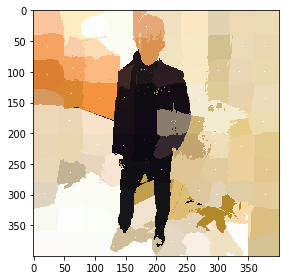

In [40]:
cluster = slic(S,image,400,400,clusters,center_assign,distance)